# 人民日報資料庫基本資訊
* 人民日報資料龐大，橫跨70年，我們先進行基本統計，各年的文章數、段落數，句子數，字詞數，字數，繪圖並檢查資料是否有缺漏。
* 接著要篩選要的文本，由於資料量龐大，同學要有自己的研究主題，方能聚焦。同學是否有閱讀我們整理的基本資訊?
* 接著給定特定關鍵詞，觀察逐年變化趨勢。
* 本週學習包重點在 colab 與 google drive 的連結。以及讀取人民日報資料庫。
* people 是我們自建的函式庫，僅供參考，還是要以學習包內的程式為主。

# 與 google drive 連線

In [1]:
import os
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# 列印 people 下面的檔案檢查
path="/content/drive/MyDrive/colab/people/"
pth="/content/drive/MyDrive/my python/people/"
os.chdir(path)
dir_list = os.listdir(path) 
print (dir_list)

['ipynb', 'pic', '基本資訊', 'data', 'corpus', 'plot', 'jieba', 'xlsx', 'xml', '__pycache__', 'p5_data_select.ipynb', 'people.py', 'p4_token.ipynb', 'people.ipynb']


# import people
* people 是我們自建的模組，僅供參考。
* 程式寫成函數，缺點是修改除錯都較不易，且功能有限，經常不符需求，優點是可以重覆使用，節省時間。
* people 函式庫（模組）有一個很大的限制，繪圖時無法使用中文。

In [2]:
# path 設定，讀檔與存檔分開來
path="/content/drive/MyDrive/colab/people/"        # 讀取的路徑
pth="/content/drive/MyDrive/my python/people/"     # 存檔時的路徑
# 更改目錄至 path 
os.chdir(path)
import people


    基本概況
        dfi=basic_info(year, path, title,rolling=1)
        df_kw= people.key_word_trend_all_year(year, kw, path, title,rolling=1)   
        df_kt= people.key_word_trend(df, kw, field, time, pth, title,rolling=1)
    資料選取
        (df, df_year)= people.doc_select(year, kw, field, unit, path, title)
        df= people.read_doc_select(unit, field, pth, title) 
        df_year= people.read_doc_select_year(unit, field, pth, title) 
        people.print_doc_select_random(df,num,field)
        df_ks=people.select_document_by_key_word(df, field, kw ,num, pth)
        people.plot_doc_select_year(df_year)
        people.print_filename(filename, field, path)
    詞頻與詞對
        df_corpus= people.corpus_map_year(df,kw, corpus,window, pth,title)
        df_corpus= people.read_corpus_map_year(kw,pth)
    情感分析
        df_pn= people.sentiment_analysis(df, field, path, title,rolling=1)
        df_pn= people.read_sentiment_cluster_analysis(pth,title)
    主題分析
        (df_tp, df_topic,df_lsa)= p

In [ ]:
import numpy as np
import pandas as pd
import random
import pickle
import re


In [3]:
# 原來的中文繪圖設定不適用
import matplotlib.pyplot as plt
import matplotlib
# # 直接繪圖，毋須 plot.show()
# %matplotlib inline  
# # 中文設定1: 楷體字
# from matplotlib import rcParams
# rcParams["font.sans-serif"] = ["kaiu"] 
# rcParams["font.family"] ="DFKai-sb"

## colab 中文繪圖設定，下載字型

In [14]:
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-03-21 22:50:24--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.204.139, 74.125.204.138, 74.125.204.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.204.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/uhreeos2mlnbtj9datd4objcls1affi8/1647903000000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-03-21 22:50:28--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/uhreeos2mlnbtj9datd4objcls1affi8/1647903000000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.204.132, 2404:6800:4008:c04::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|74.125.204.132

# 統計歷年文章數、段落數、詞數、字數
* 逐年計算，要花時間，回去再執行

In [6]:
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]
path="/content/drive/MyDrive/colab/people/"
title='count_arti_para_sent_token_word'

In [23]:
# 空白的 list 等一上填入各年數據
years=[]
count_arti=[]
count_para=[]
count_sent=[]
count_token=[]
count_word=[]
# 各年分別計算
for n in range(len(year)):
    # 從 jieba 資料夾讀取
    fname=str(year[n])+"_jieba.xlsx"
    # 注意 path
    df=pd.read_excel(path+"jieba/"+fname, 0)
    # 讀取 doc_content 資訊
    con=con=df["doc_content"].str.replace("    ","\n")
    con_list=list(con)  
    # 文章數
    count_arti.append(len(con_list))
    c_para=0
    c_sent=0
    c_token=0
    c_word=0
    for t in range(len(con_list)):
        if type(con_list[t])== str:
            # 段落
            obj=re.split('[\n]',con_list[t])  
            c_para+=len(obj)
            # 句子        
            obj=re.split('[？！：。\n]',con_list[t])
            c_sent+=len(obj)            
            # 字詞      
            obj=con_list[t].split()
            c_token+=len(obj)  
            # 字    
            obj=con_list[t].replace(' ','')
            c_word+=len(obj)  
    # 各年資料加入        
    count_para.append(c_para)     
    count_sent.append(c_sent) 
    count_token.append(c_token) 
    count_word.append(c_word) 
    years.append(year[n])
    print (year[n],end="-")   

1946 -1947 -1948 -1949 -1950 -1951 -1952 -1953 -1954 -1955 -1956 -1957 -1958 -1959 -1960 -1961 -1962 -1963 -1964 -1965 -1966 -1967 -1968 -1969 -1970 -1971 -1972 -1973 -1974 -1975 -1976 -1977 -1978 -1979 -1980 -1981 -1982 -1983 -1984 -1985 -1986 -1987 -1988 -1989 -1990 -1991 -1992 -1993 -1994 -1995 -1996 -1997 -1998 -1999 -2000 -2001 -2002 -2003 -2004 -2005 -2006 -2007 -2008 -2009 -2010 -2011 -2012 -

In [ ]:
data=list(zip(years,count_arti, count_para, count_sent, count_token, count_word))
df=pd.DataFrame(data,columns=["year","count_arti", "count_para", "count_sent", "count_token", "count_word"])
df    

,year,count_arti,count_para,count_sent,count_token,count_word
0,1946,5937,24028,117260,18909,3769042
1,1947,10771,46270,239468,36141,7574842
2,1948,8247,31914,201284,23513,6561304
3,1949,18988,117401,505899,90476,15696124
4,1950,19740,137375,621333,106284,19227195
...,...,...,...,...,...,...
62,2008,32784,32783,701353,32783,31286349
63,2009,34611,34611,763034,34611,34141974
64,2010,43550,43550,946278,43550,42156532
65,2011,40856,40856,987317,40856,44104726


## 繪圖，歷年變化
* 1946-2012
* 可能有問題的年份 1948, 1991, 1992
* 段落區分有問題的年份 2004 以後

findfont: Font family ['DFKai-sb'] not found. Falling back to DejaVu Sans.


<Figure size 1440x720 with 0 Axes>

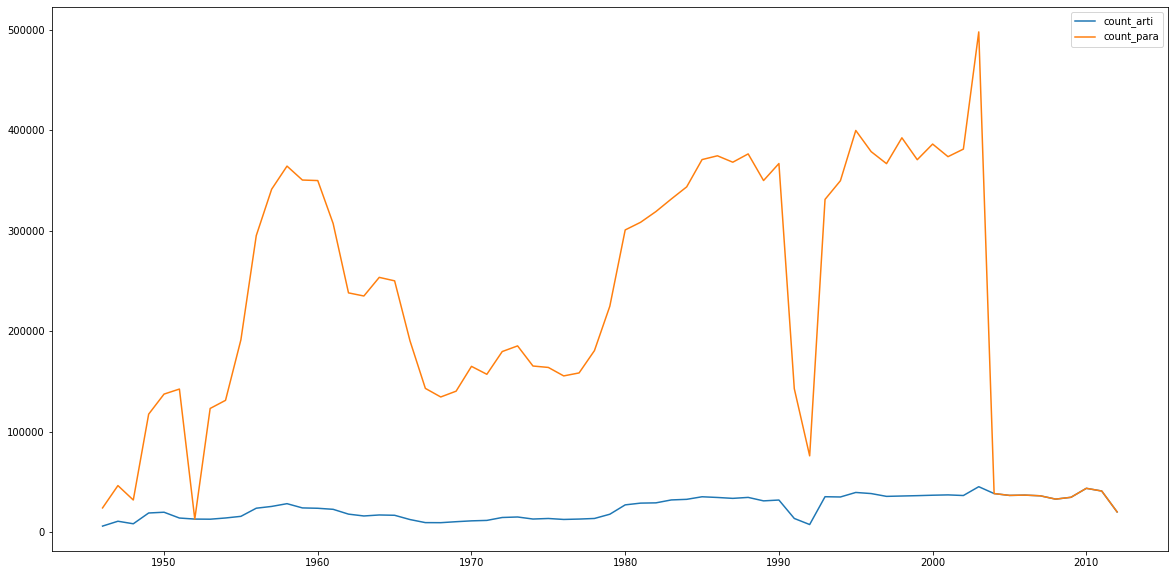

In [ ]:
plt.figure(figsize=(20,10))
df.index=year
df[["count_arti","count_para"]].plot(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

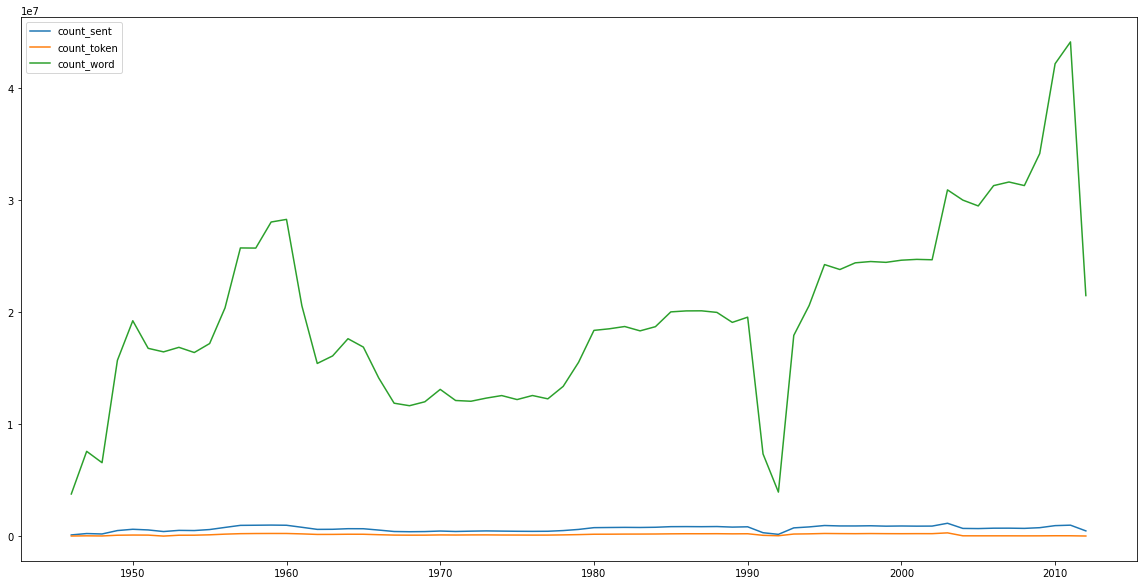

In [ ]:
plt.figure(figsize=(20,10))
df.index=year
df[["count_sent","count_token","count_word"]].plot(figsize=(20,10))

In [ ]:
df.iloc[:10]

,year,count_arti,count_para,count_sent,count_token,count_word
1946,1946,5937,24028,117260,18909,3769042
1947,1947,10771,46270,239468,36141,7574842
1948,1948,8247,31914,201284,23513,6561304
1949,1949,18988,117401,505899,90476,15696124
1950,1950,19740,137375,621333,106284,19227195
1951,1951,13959,142391,561893,100830,16765360
1952,1952,12915,12915,418784,12915,16449149
1953,1953,12801,123081,523165,89866,16854759
1954,1954,14014,131162,507697,93775,16390577
1955,1955,15643,191440,596696,127050,17193695


In [ ]:
df.iloc[40:]


,year,count_arti,count_para,count_sent,count_token,count_word
1986,1986,34436,374673,860003,222507,20104271
1987,1987,33548,368285,851890,221627,20112069
1988,1988,34508,376553,864907,226354,19970836
1989,1989,31051,350035,814452,213129,19080590
1990,1990,31886,366963,841797,221570,19544281
1991,1991,13542,142754,313825,81234,7340955
1992,1992,7486,75880,167827,43244,3937610
1993,1993,35185,331250,746245,195584,17919540
1994,1994,34924,349826,831685,213711,20589839
1995,1995,39432,399889,956471,246042,24237959


## save and read

In [ ]:
# save
title='count_arti_para_sent_token_word'
fname=pth+"data/"+title+".xlsx"
writer = pd.ExcelWriter(fname)
df.to_excel(writer,'Sheet1',encoding='utf-8')
writer.save()   

In [ ]:
# read
title='count_arti_para_sent_token_word'
fname=pth+"data/"+title+".xlsx"
df=pd.read_excel(fname, 0)
df

,Unnamed: 0,year,count_arti,count_para,count_sent,count_token,count_word
0,1946,1946,5937,24028,117260,18909,3769042
1,1947,1947,10771,46270,239468,36141,7574842
2,1948,1948,8247,31914,201284,23513,6561304
3,1949,1949,18988,117401,505899,90476,15696124
4,1950,1950,19740,137375,621333,106284,19227195
...,...,...,...,...,...,...,...
62,2008,2008,32784,32783,701353,32783,31286349
63,2009,2009,34611,34611,763034,34611,34141974
64,2010,2010,43550,43550,946278,43550,42156532
65,2011,2011,40856,40856,987317,40856,44104726


# 比較不同關鍵詞組的頻率分布
* 累計關鍵字組出現的次數，匯整至年月
* 特定關鍵字的趨勢變化。


In [18]:
################################################
# 關鍵字組，比較其分布，請用 list of list 格式， 以年月為單位
kw=[["斗争","革命","阶级"],["建设","生产"]]
# 製作蒐尋字串
str_find=[]   
for k in range(len(kw)):
    if type(kw[k])==list:
        s=""
        for n in range(len(kw[k])):
            if n!=len(kw[k])-1:
                s=s+kw[k][n]+"|"
            else:
                s=s+kw[k][n]
    else:
        print ("格式有誤，請用 list of list")
    str_find.append(s)
str_find

['斗争|革命|阶级', '建设|生产']

In [19]:
# 空白 dataframe 
ym=[]
mon=['01','02','03','04','05','06','07','08','09','10','11','12']
for y in year:
    for m in mon:
        ym.append(int(str(y)+str(m)))
df3=pd.DataFrame(index=range(len(ym)))    

# 計算字頻 str_find
for k in range(len(str_find)):
    print (str_find[k],'......')
    # 空白 dataframe
    df0=pd.DataFrame(columns=["era"+str(k),"num"+str(k),"total"+str(k)]) 
    # 逐篇文章計算  
    for n in range(len(year)):
        # 讀取 xlsx 成為 dataframe
        try:  # 如果該檔存在
            path2='/content/drive/MyDrive/colab/people/jieba/'
            fname=str(year[n])+"_jieba.xlsx"
            df=pd.read_excel(path2+fname, 0)    
            
            # 為了節省時間，我們只取1/10 #####################
            df=df.sample(int(len(df)/10))
            df=df.sort_index(axis = 0)
            df.index=range(len(df))
            ################################################

            # 選擇欄位 doc_content
            doc_content=list(df.doc_content)
            # era 為年月欄位
            era=list(df.era)   
            num=[]   # 找到的次數
            total=[]   # 總字數
            for m in range(len(df)):
                # 蒐尋 findall()
                num.append(len(re.findall(str_find[k],doc_content[m])))
                # 總字數
                total.append(len(doc_content[m]))     
            # dataframe, 有好幾組要比較        
            data=list(zip(era, num,total))
            df2=pd.DataFrame(data,columns=["era"+str(k),"num"+str(k),"total"+str(k)])            

            # 加總至 era
            era_uni=sorted(set(df['era'].unique()))
            # 列印個數
            num_sum=[]
            total_sum=[]
            # 彙總至era 年月欄位
            for ym in era_uni:
                num_sum.append(df2[df2['era'+str(k)]==ym]['num'+str(k)].sum())
                total_sum.append(df2[df2['era'+str(k)]==ym]['total'+str(k)].sum())    

            # 填入 df0，各年度垂直整併
            dfa=pd.DataFrame(list(zip(era_uni,num_sum,total_sum)),columns=["era"+str(k),"num"+str(k),"total"+str(k)])
            df0=df0.append(dfa)      
            print (year[n],"-", end="")            
        except:
            print(fname, "not exist")
  
    # 排序，重新編碼
    df0= df0.sort_values("era"+str(k), ascending=True)
    df0.index=range(len(df0))
    # 每萬個字出現關鍵字次數, 計算比例
    df0['ratio'+str(k)]=df0["num"+str(k)]/(df0["total"+str(k)]*10000)
     
    # 水平整併
    df3 = pd.concat([df3, df0], axis=1)
    # 刪除 na
    df3=df3.dropna()

1946 done,1947 done,1948 done,1949 done,

Exception ignored in: <function ZipFile.__del__ at 0x7ff35d044ef0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/zipfile.py", line 1809, in __del__
    self.close()
  File "/usr/lib/python3.7/zipfile.py", line 1826, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


1950 done,1951 done,1952 done,1953 done,1954 done,1955 done,1956 done,1957 done,1958 done,1959 done,1960 done,1961 done,1962 done,1963 done,1964 done,1965 done,1966 done,1967 done,1968 done,1969 done,1970 done,1971 done,1972 done,1973 done,1974 done,1975 done,1976 done,1977 done,1978 done,1979 done,1980 done,1981 done,1982 done,1983 done,1984 done,1985 done,1986 done,1987 done,1988 done,1989 done,1990 done,1991 done,1992 done,1993 done,1994 done,1995 done,1996 done,1997 done,1998 done,1999 done,2000 done,2001 done,2002 done,2003 done,2004 done,2005 done,2006 done,2007 done,2008 done,2009 done,2010 done,2011 done,2012 done,1946 done,1947 done,1948 done,1949 done,1950 done,1951 done,1952 done,1953 done,1954 done,1955 done,1956 done,1957 done,1958 done,1959 done,1960 done,1961 done,1962 done,1963 done,1964 done,1965 done,1966 done,1967 done,1968 done,1969 done,1970 done,1971 done,1972 done,1973 done,1974 done,1975 done,1976 done,1977 done,1978 done,1979 done,1980 done,1981 done,1982 done,

In [24]:
df3

,era0,num0,total0,ratio0,era1,num1,total1,ratio1
date,,,,,,,,
1946-05-01,194605,167,251659,6.635964,194605,385,251659,15.298479
1946-06-01,194606,262,390108,6.716089,194606,470,390108,12.047946
1946-07-01,194607,376,449216,8.370138,194607,362,449216,8.058484
1946-08-01,194608,368,479220,7.679145,194608,447,479220,9.327657
1946-09-01,194609,508,541119,9.387953,194609,361,541119,6.671361
...,...,...,...,...,...,...,...,...
2012-03-01,201203,470,3971870,1.183322,201203,8360,3971870,21.04802
2012-04-01,201204,369,3160102,1.167684,201204,5767,3160102,18.249411
2012-05-01,201205,852,3967080,2.147675,201205,6871,3967080,17.320044


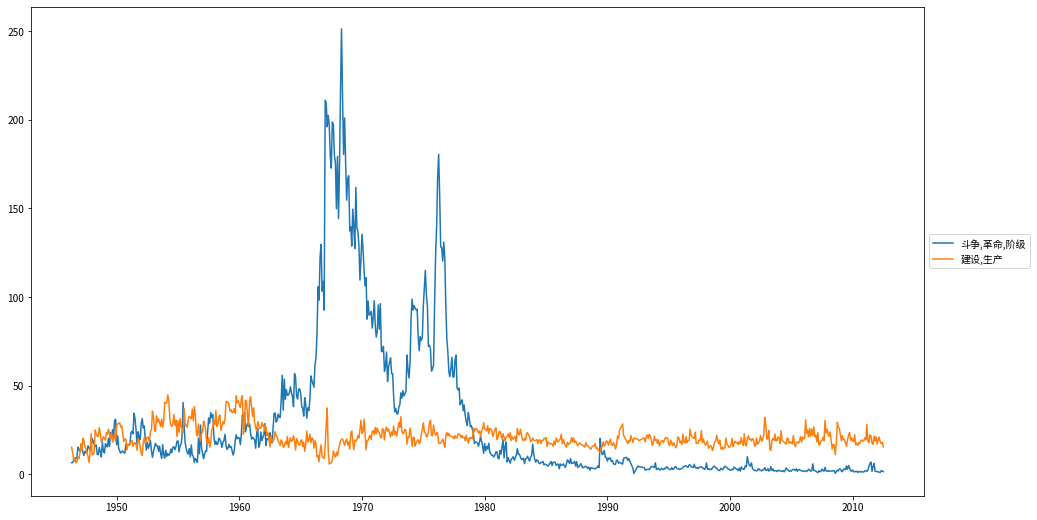

In [21]:
# 繪圖，記得我們已先設定了字型
df3['date'] = pd.to_datetime(df3['era0'], format="%Y%m")
df3.set_index('date', inplace=True)

# 圖面大小
plt.figure(figsize=(16,9))
for k in range(len(kw)):
    plt.plot(df3["ratio"+str(k)],label=",".join(kw[k])) 
# 圖例
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
plt.show()

## 放大某個時段

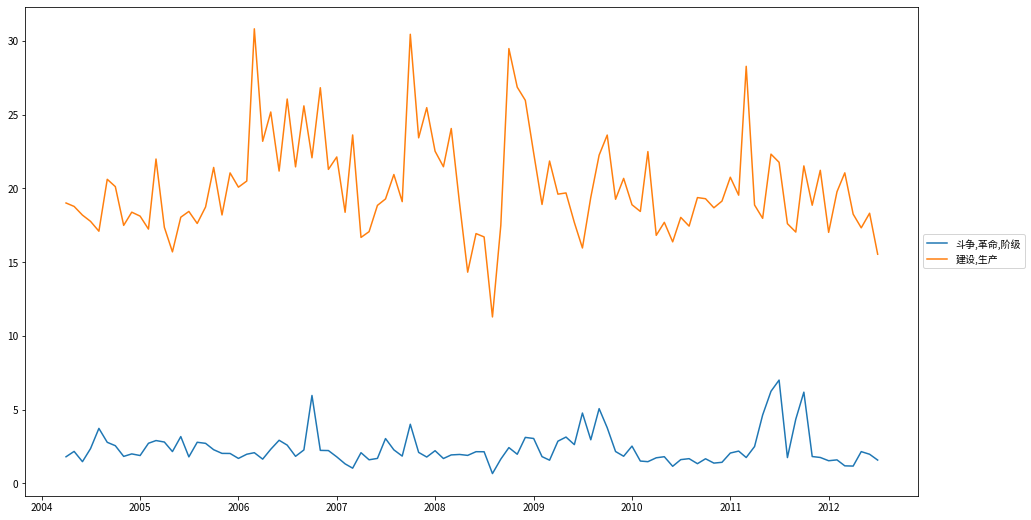

In [25]:
# 圖面大小
plt.figure(figsize=(16,9))
for k in range(len(kw)):
    plt.plot(df3["ratio"+str(k)][-100:],label=",".join(kw[k])) 
# 圖例
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
plt.show()

# 設定條件篩選：版次、關鍵字等
* 依年度分別計算會花時間

In [26]:
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]

In [28]:
import re
import pandas as pd
sentences=[]
years=[]
filenames=[]
titles=[]
df1=pd.DataFrame()
for n in range(len(year)):
    # 選擇斷詞好的文本
    fname=str(year[n])+"_jieba.xlsx"
    df=pd.read_excel(path+"jieba/"+fname, 0)   
    # 條件篩選 ######################################
    df = df.fillna("")
    df=df[df.compilation_vol=="第1版"]
    df=df[df.doc_content.str.contains('台湾')]    
    ################################################
    # 選取欄位
    df=df[["corpus","filename","title","doc_content","token","tfidf"]]
    # 逐年合併
    df1 = pd.concat( [df, df1], axis=0, ignore_index=True)  # 加 ignore_index=True 則重新編碼    
    print (year[n],end="-")

1946-1947-1948-1949-1950-1951-1952-1953-1954-1955-1956-1957-1958-1959-1960-1961-1962-1963-1964-1965-1966-1967-1968-1969-1970-1971-1972-1973-1974-1975-1976-1977-1978-1979-1980-1981-1982-1983-1984-1985-1986-1987-1988-1989-1990-1991-1992-1993-1994-1995-1996-1997-1998-1999-2000-2001-2002-2003-2004-2005-2006-2007-2008-2009-2010-2011-2012-

In [9]:
df1

,corpus,filename,title,doc_content,token,tfidf
0,2012,人民日報_20120702_1_1,胡锦涛主席离港返京,本报香港７月１日电（记者吴绮敏、尹世昌、李永宁）中共中央总书记、国家主席、中央军委主席胡锦涛...,本报 香港 ７ 月 １ 日电 （ 记者 吴绮敏 尹世昌 李 永宁 ） 中共中央总书记 国家主...,"胡锦涛,香港,香港特别行政区,司长,梁振英,中共中央书记处书记,主任,欢送,曾荫权,行政长官..."
1,2012,人民日報_20120702_1_2,庆祝香港回归祖国15周年大会暨香港特别行政区第四届政府就职典礼隆重举行,7月1日，中共中央总书记、国家主席、中央军委主席胡锦涛在庆祝香港回归祖国15周年大会暨香港特...,7 月 1 日 ， 中共中央总书记 国家主席 中央军委主席 胡锦涛 在 庆祝 香港 回归祖国...,"香港,香港特别行政区,一国两制,胡锦涛,梁振英,基本法,就职典礼,回归祖国,宣誓就职,政府,..."
2,2012,人民日報_20120702_1_3,胡锦涛会见梁振英,7月1日，国家主席胡锦涛在香港会见香港特别行政区第四任行政长官梁振英。新华社记者王晔摄本报香...,7 月 1 日 ， 国家主席 胡锦涛 在 香港 会见 香港特别行政区 第四任 行政长官 梁振...,"香港,梁振英,胡锦涛,会见,香港特别行政区,行政长官,行政区,国家主席,第四任,中央政府,胡..."
3,2012,人民日報_20120701_1_144,胡锦涛考察香港启德发展计划（庆祝香港回归15周年）,六月三十日，国家主席胡锦涛在香港考察启德发展计划。这是胡锦涛在公共房屋建设工地同工程师和工人...,六月 三十日 ， 国家主席 胡锦涛 在 香港 考察 启德 发展 计划 。 这 是 胡锦涛 在...,"启德,胡锦涛,公共房屋,香港,邮轮,建设,码头,发展,九龙,香港特别行政区政府,计划,市民,..."
4,2012,人民日報_20120701_1_145,胡锦涛出席香港特别行政区政府欢迎晚宴并发表重要讲话（庆祝香港回归15周年）,六月三十日，国家主席胡锦涛出席香港特别行政区政府欢迎晚宴并作重要讲话。新华社记者鞠鹏摄本报香...,六月 三十日 ， 国家主席 胡锦涛 出席 香港特别行政区政府 欢迎 晚宴 并作 重要讲话 。...,"香港,胡锦涛,曾荫权,晚宴,香港特别行政区政府,祖国,弘扬,出席,行政长官,多一些,行政区,..."
...,...,...,...,...,...,...
200303,1946,人民日報_19461231_1_1573,朱总司令元旦向全国广播,延安新华广播电台在元旦日请朱德总司令、在除夕日请范长江向全国同胞广播演说，时间均在十九点（上...,延安 新华 广播电台 在 元旦 日 请 朱德 总司令 在 除夕 日 请 范长江 向 全国同胞...,"日请,广播电台,波长,延安,新华,十九点,全国同胞,千周,范长江,七五,管弦乐团,播送,该台..."
200304,1946,人民日報_19461231_1_1575,一年来完全违背莫斯科三国决议欲加速中国沦为美国殖民地过程杜鲁门声明是掩饰对华反动政策周恩来同...,新华社记者顷就目前时局有关问题访问周恩来将军，兹记其问答如下：问：美国杜鲁门总统今年十二月十...,新华社 记者 顷就 目前 时局 有关 问题 访问 周恩来 将军 ， 兹 记 其 问答 如下 ...,"国大,蒋介石,政府,杜鲁门,政协,停战,内战,谈判,中国,美国政府,国共,声明,停战协定,美..."
200305,1946,人民日報_19461231_1_1574,电贺徐老寿诞中央局暨军区司令部,中共晋冀鲁豫中央局暨晋冀鲁豫军区司令部电贺徐特立同志七秩大寿，原电如下：延安中央宣传部徐特立...,中共 晋冀鲁豫 中央局 暨 晋冀鲁豫军区司令 部 电贺 徐特立 同志 七 秩 大寿 ， 原 ...,"徐特立,同志,大寿,寿辰,电贺,欣逢,学而不厌,谨以,晋冀鲁豫军区司令,原电,之辰,诲人不倦..."
200306,1946,人民日報_19461231_1_1576,依联合国精神奠定中国联合政府基础由苏美英法与中国主要政党领袖参加建议召集圆桌会议促美政府停止...,综合合众社美联社华府十八日电：美民主党参议员莫莱与共和党议员佛兰德斯十八日联名发表文告督促美...,综合 合众社 美联社 华府 十八日 电 ： 美 民主党 参议员 莫莱 与 共和党 议员 佛兰...,"文告,美国,大学教授,参院,三强,和平,佛兰德,参议员,中国,援助,蒋介石,记录簿,作家,莫..."


In [29]:
## 存檔
title="第一版"
pth="/content/drive/MyDrive/my python/people/"
fname=pth+'data/'+title+".xlsx"
writer = pd.ExcelWriter(fname)
df1.to_excel(writer,'Sheet1',encoding='utf-8')
writer.save()

In [30]:
###################################################
title="第一版"
pth="/content/drive/MyDrive/my python/people/" 
fname=pth+'data/'+title+".xlsx"
df1=pd.read_excel(fname, 0)
df1

,Unnamed: 0,corpus,filename,title,doc_content,token,tfidf
0,0,2012,人民日報_20120629_1_236,贾庆林会见伊斯兰合作组织秘书长,本报北京６月２８日电（记者杨晔）全国政协主席贾庆林２８日在人民大会堂会见了来华参加“中国与伊...,本报 北京 ６ 月 ２ ８ 日电 （ 记者 杨晔 ） 全国政协主席 贾庆林 ２ ８ 日 在 ...,"伊斯兰,贾庆林,合作,中国,关系,文明,伊赫桑,奥卢,伙伴,国家,赞赏,研讨会,会见,组织,..."
1,1,2012,人民日報_20120618_1_1392,第四届海峡论坛大会在厦门举行,本报厦门６月１７日电（记者蒋升阳、钟自炜）6月的鹭岛，万木葱茏，生机盎然。１７日上午，第四届...,本报 厦门 ６ 月 １ ７ 日电 （ 记者 蒋 升阳 钟自炜 ） 6 月 的 鹭岛 ， 万木...,"两岸,两岸关系,交流,民众,台湾,和平,发展,民间,基层,合作,贾庆林,台湾同胞,支持,同胞..."
2,2,2012,人民日報_20120617_1_1536,第四届海峡论坛在厦门开幕,本报厦门６月１６日电（记者蒋升阳、钟自炜）第四届海峡论坛１６日晚在福建厦门开幕。中共中央政治...,本报 厦门 ６ 月 １ ６ 日电 （ 记者 蒋 升阳 钟自炜 ） 第四届 海峡 论坛 １ ６...,"两岸,论坛,海峡,台湾,基层,开幕式,举办,合作,第四届,交流,青年,晚会,贴近,创新,开幕..."
3,3,2012,人民日報_20120616_1_1593,筑基强警谱华章,本报记者黄庆畅张洋基层兴，则公安事业兴；基础强，则公安事业强。党的十七大以来，坚持以深化“三...,本报记者 黄庆畅 张洋 基层 兴 ， 则 公安 事业 兴 ； 基础 强 ， 则 公安 事业 ...,"警务,公安机关,民警,2011,公安,社区,群众,基层,执法,建设,10,公安民警,实战,信..."
4,4,2012,人民日報_20120614_1_1784,北大 志存高远又出发,本报记者赵婀娜6月的燕园，万木葱茏，繁花似锦。中国共产党北京大学第十二次代表大会隆重召开。在...,本报记者 赵 婀娜 6 月 的 燕园 ， 万木 葱茏 ， 繁花似锦 。 中国共产党 北京大学...,"北大,一流大学,世界,北京大学,创建,中国大学,大学,50,发展,国际,学术,人才培养,高校..."
...,...,...,...,...,...,...,...
8571,8571,1946,人民日報_19461116_1_625,新的卖国谈判正在进行蒋美订有秘密协定美海军上将柯克透露：,美国海军部助理肯尼与驻华美海军上将柯克十二日在上海联合招待记者时透露，五月间蒋介石曾对美国成...,美国 海军部 助理 肯尼 与 驻华 美 海军上将 柯克 十二日 在 上海 联合 招待 记者 ...,"肯尼,柯克,美国,卖国,海军,船坞,上海,透露,协定,万美元,海岸,谈判,旋飞,柯克强,词称..."
8572,8572,1946,人民日報_19461117_1_4095,蒋介石出卖中国王宗一马歇尔在四月十四日美国国庆日在南京美大使馆的鸡尾酒会上，坦白讲出“菲律滨...,\n\n\n\n蒋介石出卖中国\n王宗一\n马歇尔在四月十四日美国国庆日在南京美大使馆的鸡尾...,\n \n \n \n 蒋介石 出卖 中国 \n 王宗 一 \n 马歇尔 在 四月 十四日 ...,"美国,中国,蒋介石,国民党,条约,美帝国主义,军事,出卖,美军,日本,顾问团,外国,治外法权..."
8573,8573,1946,人民日報_19461203_1_4411,美人排斥在华英商英议员哈威、巴登建议考察美式沙特阿拉伯军队开入外约旦声称反对英式“大叙利亚帝...,中东爆发战事。美国装备的沙特阿拉伯军队开入外约旦边境地带，已发生战事。沙特阿拉伯方面宣布，进...,中东 爆发 战事 。 美国 装备 的 沙特阿拉伯 军队 开入 外 约旦 边境 地带 ， 已 ...,"阿布拉,约旦,出口品,战事,沙特阿拉伯,叙利亚,伊拉克,议员,中东,访问,美国,迄未,运出来..."
8574,8574,1946,人民日報_19461209_1_29,为了做生意沪军警火并,蒋记上海军警及台湾法警与警察，上月相继发生火并事件。上海方面驻江湾之蒋军一四六旅副官处与该地...,蒋记 上海 军警 及 台湾 法警 与 警察 ， 上 月 相继 发生 火并 事件 。 上海 方...,"法警,警察,十一日,该局,开枪,副官,四十余名,殴伤,蒋记,各以,六旅,罗导率,警士,四响,..."


# 篩選所有標題含有社論二字者

In [ ]:
year=
kw="社论"
title="社论"

In [ ]:
import re
import pandas as pd
sentences=[]
years=[]
filenames=[]
titles=[]
df1=pd.DataFrame()
for n in range(len(year)):
    fname=str(year[n])+"_jieba.xlsx"
    df=pd.read_excel(path+"jieba/"+fname, 0)   
    df = df.fillna("")
    try:
        # 含有社論二字者
        #####################################
        df=df[(df.docclass.str.contains(kw))|(df.doctype.str.contains(kw))|(df.compilation_name.str.contains(kw))
          |(df.compilation_vol.str.contains(kw))]
        #####################################  
        df=df[["corpus","filename","title","doc_content","token","tfidf"]]
        df1 = pd.concat( [df, df1], axis=0, ignore_index=True)  # 加 ignore_index=True 則重新編碼
    except:
        print (year[n])
df1 = df1.sort_values(['filename'], ascending=True)
df1.index=range(len(df1))


In [ ]:
df1

# 以關鍵字組篩選原始資料
* 分析單元：文章，段落，句子


In [ ]:
kw=['']   # 空白代表不設
field ="textrank"  
unit ="arti"     
path="/content/drive/MyDrive/colab/people/"
title="all"  
(df, df_year)=doc_select(year, kw, field, unit, path, title)

In [42]:
kw=["斗争","革命","阶级"]
field ="doc_content"  
unit ="arti"     
path="/content/drive/MyDrive/colab/people/"
title="鬥爭"  

In [47]:
objects=[]
years=[]
filenames=[]
titles=[]
count=[]
rate=[]
ye=[]

for n in range(len(year)):
    fname=str(year[n])+"_jieba.xlsx"
    df=pd.read_excel(path+"jieba/"+fname, 0)

    con=df[field].str.replace("    ","\n")
    con_list=list(con)  

    # 分析單元：文章，段落，句子
    num_obj=0
    for t in range(len(con_list)):
        if type(con_list[t])== str:
            # 如果 field 是 tfidf or textrank, 改為 arti
            if field in ["tfidf","textrank"]:
                unit="arti"
                obj=[con_list[t]]
            if unit=="para":
                # 如果是段落
                obj=re.split('[\n]',con_list[t])   
                num_obj+=len(obj)  
            elif unit=="sent":
                # 如果是句子        
                obj=re.split('[？！：。\n]',con_list[t])
                num_obj+=len(obj) 
            elif unit=="arti":    
                # 以文章為單位
                obj=[con_list[t]]
                num_obj+=len(obj) 
            # 選擇列入
            if len(obj)>0:
                for s in obj:
                    # 有關鍵字組
                    if len(kw)>0:
                        for k in kw:
                            if s.find(k)>0:          
                                objects.append(s)
                                years.append(year[n])
                                titles.append(df.title[t])
                                filenames.append(df.filename[t])                            
                                break  
                    # 無關鍵字組            
                    else:
                        objects.append(s)
                        years.append(year[n])
                        titles.append(df.title[t])
                        filenames.append(df.filename[t])   
    # 以年為單位，累計次數 
    count.append(len(objects))
    rate.append(len(objects)/num_obj)
    ye.append(year[n])
    if unit =="arti":
        print (year[n],"done", len(objects))
    else:    
        print (year[n],"done",len(objects),num_obj,len(objects)/num_obj)

if unit =="arti":
    data=list(zip(years,filenames, titles, objects))
    df=pd.DataFrame(data,columns=["year","filename","title",field])
    # 合併至年，累計該年數目
    data=list(zip(ye,count, count))
    df_year=pd.DataFrame(data,columns=["year","count","rate"])   
else:    
    data=list(zip(years,filenames, titles, objects))
    df=pd.DataFrame(data,columns=["year","filename","title",field])
    # 合併至年，累計該年數目與比例
    data=list(zip(ye,count, rate))
    df_year=pd.DataFrame(data,columns=["year","count","rate"])     
            



1946 done 1330
1947 done 4459
1948 done 7026
1949 done 13612
1950 done 20183
1951 done 26130
1952 done 31603
1953 done 35766
1954 done 39658
1955 done 43799
1956 done 48282
1957 done 56065
1958 done 64930
1959 done 72680
1960 done 82586
1961 done 88744
1962 done 93917
1963 done 99431
1964 done 106811
1965 done 114560
1966 done 122270
1967 done 129663
1968 done 137154
1969 done 145550
1970 done 154208
1971 done 161364
1972 done 168563
1973 done 175612
1974 done 183045
1975 done 190513
1976 done 198043
1977 done 204577
1978 done 210011
1979 done 214750
1980 done 219551
1981 done 224322
1982 done 228715
1983 done 233125
1984 done 237004
1985 done 240806
1986 done 244229
1987 done 247619
1988 done 250176
1989 done 254023
1990 done 257638
1991 done 258989
1992 done 259477
1993 done 261628
1994 done 264054
1995 done 266886
1996 done 270217
1997 done 273438
1998 done 276488
1999 done 279461
2000 done 282230
2001 done 285770
2002 done 288212
2003 done 291215
2004 done 293673
2005 done 296239
2

NameError: ignored

In [48]:
df

,year,filename,title,doc_content
0,1946,人民日報_19460515_2_1945,人民日报发刊志祝,\n\n\n\n\n真正人民的报纸不仅是人民的喉舌，还应是人民的司机和人民事业的组织者；在当...
1,1946,人民日報_19460515_3_1959,英勇的四平街保卫战,\n\n\n\n\n刘白羽\n记者整日穿行在激战的阵地上，四平街的保卫战已进至第二十四天了。...
2,1946,人民日報_19460515_3_1958,消息报记者报导法国宪草复决失败原因,塔斯社巴黎八日电：消息报记者报导法国宪草复决失败的原因说：大家知道，反动派如共和自由党、人民...
3,1946,人民日報_19460515_3_1955,日共力主联合内阁片山组阁搁浅,日本社会党领导人，日来与日共谈判组织新闻问题，日共力主在民主阵线的基础上，建立民主政府，并反...
4,1946,人民日報_19460515_1_4256,发刊词,\n\n\n\n\n本报——人民日报，晋冀鲁豫边区广大人民的报纸出版了。\n晋冀鲁豫边区的人...
...,...,...,...,...
313352,2012,人民日報_20120104_24_20556,他终身为爱情而歌唱,梁衡南国冬日，冒着凛冽的海风，我来到福建惠安，看一个给全世界留下了永远的爱，自己却没有得到爱...
313353,2012,人民日報_20120103_2_20570,肝胆相照创伟业 凝心聚力谱华章,台盟中央主席林文漪伴随着欢乐的新年钟声，我们共同迎来了2012年。值此举国同庆的时刻，祝福全...
313354,2012,人民日報_20120102_2_20598,在全国政协新年茶话会上的讲话,同志们，朋友们：今天是２０１２年元旦。我们在这里欢聚一堂，共庆佳节，畅叙友情，展望未来，感到...
313355,2012,人民日報_20120101_1_20621,胡锦涛致电祝贺金正恩担任朝鲜人民军最高司令官,新华社北京１２月３１日电中华人民共和国中央军事委员会主席胡锦涛３１日致电祝贺金正恩担任朝鲜人...


In [49]:
df_year

,year,count,rate
0,1946,1330,1330
1,1947,4459,4459
2,1948,7026,7026
3,1949,13612,13612
4,1950,20183,20183
...,...,...,...
62,2008,302995,302995
63,2009,305838,305838
64,2010,308495,308495
65,2011,312145,312145


## 儲存 pickle 檔

In [54]:
import pickle
fname=pth+"data/arti_textrank_all.pkl"
pth="/content/drive/MyDrive/my python/people/"
with open(fname, "wb") as fp:   #Pickling
    pickle.dump(df, fp)  

## 讀取 pickle 檔

In [ ]:
1# 讀取 pickle 檔
filename='data/arti_textrank_all.pkl'
pth="/content/drive/MyDrive/my python/people/"
df=people.read_pkl_file(filename, pth)
df

## 隨機閱讀文本

In [84]:
df_sample.filename.iloc[n]

'人民日報_19670129_1_364262'

In [91]:
obj=re.split('[？！：。\n]',df_sample[field].iloc[n])
obj

['',
 '',
 '',
 '',
 '巴卢库同志率阿军事代表团回到北京',
 '叶剑英等同志到机场迎接阿尔巴尼亚战友',
 '二十八日讯阿尔巴尼亚劳动党中央政治局委员、部长会议副主席兼国防部长贝基尔·巴卢库，阿尔巴尼亚劳动党中央委员、阿尔巴尼亚人民军政治部主任希托·恰科和由他们率领的阿尔巴尼亚军事代表团，在去我国南方参观访问后，今天，在中共中央委员、国防部副部长王树声陪同下，乘专机从广州回到北京',
 '',
 '中共中央政治局委员、国防委员会副主席叶剑英，中共中央委员、中国人民解放军总政治部主任萧华，中国人民解放军副总参谋长彭绍辉，以及解放军各有关方面负责同志张贤约、赵启民、谭家述、潘振武等到机场迎接',
 '',
 '阿尔巴尼亚驻中国大使瓦西里·纳塔奈利也到机场迎接',
 '',
 '在机场上，巴卢库、恰科等同志同叶剑英、萧华等同志热情握手，亲切交谈',
 '巴卢库同志感谢安排这次参观访问，他说，这次到武汉、广州，和解放军指战员、红卫兵、工人、公社社员进行了广泛接触，到处看到高昂的政治热情',
 '叶剑英同志说',
 '“你们的参观访问对他们鼓舞很大',
 '”巴卢库同志接着说，他们对我们鼓舞很大，在整个参观访问中，最使我们感动的是革命群众，他们和毛泽东同志密切地联系在一起',
 '',
 '阿尔巴尼亚战友们是今天上午乘专机离开广州的',
 '中国人民解放军广州部队负责人，广州部队领导机关负责人，以及驻广州陆海空三军指战员八百多人，到机场热烈欢送',
 '',
 '在广州的中阿轮船公司阿方经理瓦斯科·留包里亚、处长南万·兰恰利等也到机场欢送',
 '']

In [96]:
num=1
field='doc_content'
df_sample=df.sample(num)
for n in range(len(df_sample)):
    print(df_sample.filename.iloc[n])
    obj=re.split('[？！：。\n]',df_sample[field].iloc[n])
    for o in obj:
      print (o)
    print ("---------------------------")

人民日報_20070101_2_37177
１９４２年１０月１９日至１９４３年１月１４日，在中共中央直接领导下，中共中央西北局高级干部会议（又称陕甘宁边区高级干部会议）在延安召开
这次会议的主要任务是利用全党整风的机会，总结陕甘宁边区党的历史和检查陕甘宁边区的工作
参加会议的正式代表２６６人，其中陕甘宁边区一级的党、政、军、民、学负责干部９７人，分区党、政及军队旅一级的负责干部５２人，县级党、政及军队团一级的负责干部１１７人
会议期间，延安中央高级学习组成员及在中央党校学习的一部分干部旁听了会议
此外，在会议开幕、闭幕和讨论边区财政经济问题时，还邀请了政府和财经机关的党外负责人参加会议
毛泽东在开幕式和闭幕式上讲了话
会议期间，毛泽东作了《经济问题与财政问题》的书面报告和《关于党的布尔什维克化的十二条》的讲演
西北局高级干部会议历时８０多天，解决了以下三个方面的主要问题
一是总结了陕甘宁边区党的历史经验，分清了路线是非
会议认为，土地革命战争时期，谢子长、刘志丹等从实际出发，在陕甘宁边区发动游击战争，建立革命根据地，实行土地革命的路线是正确的
会议指出，陕甘宁边区党的历史上一些重大原则问题的争论，长期以来未能彻底解决，一个重要原因就是边区党内的一些同志，没有掌握马克思主义必须同中国革命实践相结合的思想
为此，毛泽东在会上用了两天时间，结合中国共产党的情况，逐条讲解斯大林《论布尔什维克化十二条》，帮助清理边区党的历史上的路线是非
通过整风文件的学习和对边区党的历史问题的讨论，广大党员和干部提高了觉悟，懂得了什么是主观主义、宗派主义、党八股，分清了路线是非
二是检讨了抗战以来边区党内的思想偏向，加强了党的统一领导
会议指出，抗战以来，陕甘宁边区党内的思想偏向主要表现在
思想上的主观主义，在工作中缺乏调查研究，处理问题主观片面；政策上的糊涂观念，实行“三三制”政策中的关门主义残余，错误地解释宽大政策；组织上闹独立性、自由主义、下级不执行上级指示、各自为政；领导作风上的官僚主义和军队中的军阀主义残余等
会议用大会讨论的方式集中批评了这些思想偏向
同时，为加强党的领导，会议决定，边区一级的党政军民工作都统一于中共中央西北局，分区一级的党政军民工作都统一于党的地方委员会；为更加密切军队和地方的关系，发起拥政爱民和拥军运动；整顿党的组织，重新登记党员等
三是会议认真学习和讨论了毛

## 指定閱讀某個文本

In [66]:
filename='人民日報_19700624_6_397803'
path="/content/drive/MyDrive/colab/people/"
field=['filename','title','doc_content','token','textrank']

In [77]:
year=filename[5:9]
fname=str(year)+"_jieba.xlsx"
temp=pd.read_excel(path+"jieba/"+fname, 0) 
content=temp[temp.filename==filename][field]     
for col in field:
  print (col,"---")
  print (list(content[col])[0])

filename ---
人民日報_19700624_6_397803
title ---
美帝为后台日本反动派当主角的惠灵顿黑会收场美帝及其帮凶和傀儡妄图在亚洲扩大侵略、扑灭亚洲人民的革命烈火佐藤反动政府更加暴露充当美帝亚洲宪兵的反动嘴脸
doc_content ---




美帝为后台日本反动派当主角的惠灵顿黑会收场
美帝及其帮凶和傀儡妄图在亚洲扩大侵略、扑灭亚洲人民的革命烈火
佐藤反动政府更加暴露充当美帝亚洲宪兵的反动嘴脸
二十三日讯最近在新西兰的惠灵顿举行了一个由美国当后台、日本当主角的所谓第五次“亚洲和太平洋理事会部长会议”。参加会议的，除了日本佐藤反动政府外，还有南越傀儡阮文绍—阮高其集团、南朝鲜朴正熙傀儡集团、泰国他侬傀儡集团、蒋介石匪帮、
“马来西亚”拉赫曼集团、菲律宾、澳大利亚、新西兰的反动当局。它们不是直接出兵参加、就是卖力支持美帝侵略印度支那战争，真是一次清一色的美帝帮凶和傀儡会议。
从这一小撮在会上发表的公报、讲话以及会前会后的活动来看，这次会议是当前美帝及其同伙企图在亚洲扩大侵略、扑灭亚洲人民的革命烈火的阴谋的一个组成部分。
会议公报鼓吹亚洲和太平洋地区的美国的仆从和帮凶“在迅速变化和发展的时期，需要在最广泛的基础上进行地区合作”，“目的是建立一个新的共同体”。菲律宾外长则更露骨地叫嚷，“由于印度支那战斗的升级和几个亚洲国家（包括菲律宾在内）的国内困难，在亚太地区采取区域性集体行动变得更加紧迫了”。
以佐藤反动政府出面带头的美帝走狗和帮凶在会上大肆诬蔑中华人民共和国和朝鲜民主主义人民共和国，攻击中国坚持执行无产阶级外交政策“对亚洲地区的稳定说来是一个危险的信号”，叫嚷要“密切注视今后的事态发展”，并且颠倒黑白地把美帝及其走狗在朝鲜半岛制造紧张局势的罪责强加给朝鲜人民。同时，他们通过发表公报，互相吹捧打气，对南越傀儡集团、老挝右派集团和柬埔寨右派集团，表示“深切同情”，对南朝鲜傀儡集团，表示“热烈赞扬”，并且叫嚷说，会议的每个成员要“考虑自己能向老挝和柬埔寨提供什么援助”。
这些都充分反映了美国的意图，即拼凑一个以美国为后台、以日本为骨干的新的亚洲太平洋反共联盟。
会议公报极力吹捧不久前开过的、所谓讨论柬埔寨问题的雅加达黑会，说什么雅加达会议“是有意义的”，它“所采取的磋商做法将有助于和平解决柬埔寨问题和促使进一步采取行动来解决本地区一些悬

In [75]:
list(content[col])[0]

'亚洲,会议,集团,日本,美国,傀儡,反动,黑会,印度支那,柬埔寨,地区,帮凶,侵略,公报,中国,政府,菲律宾,叫嚷,外长,雅加达,宪兵,部长会议,东南亚,亚太地区,右派,南越,后台,主角,官员,发展,革命,运动,国家,军国主义,惠灵顿,扑灭,罪责,汇报,走狗,吹捧,制造,特使,南朝鲜,老挝,妄图,攻击,理事会,朝鲜民主主义人民共和国,日本政府,卖力,苏联,外交政策,注视,汹涌,新西兰,怒涛,马来西亚,采取行动,解决,太平洋地区,名义,强加,太平洋,抵挡,嘴脸,亚洲地区,支持,暴露,变化,升级,罗杰斯,执行,主管,促使,集体行动,变得,区域性,朝鲜半岛,义务,拉赫曼,中华人民共和国,露骨,国务卿,阮高其,承担,带头,出面,鼓吹,大使,诬蔑,收场,反动派,澳大利亚,打气,转告,爱知,呼声,事态,有助于,亚太,推行,驻外使馆,战争,时期,葛罗米柯,朝鲜,尼克松,蒋介石,匪帮,地位,经济,阮文绍,开发,同谋者,泰国,仆从,飞往,游说,共同体,逆流,日内瓦,稳定,会谈,拼凑,意图,战斗,理事,同情,深切,盟主,美帝国主义,复活,履行,开过,磋商,当局,政策,骨干,合作,赞扬,信号,联合公报,策划,出兵,发挥,讲话,成员,结束,相爱,援助,同伙,三国'

# 作業
* 本週告訴同學 colab 與google drive 連線的方法，以及 people 模組運作方式，有問題請一定要發問。
* 請同學詳讀給大家的中國大陸基本資訊，仔細思考可以研究什麼主題，並著手下載資料。
* 因為人民日報資料庫很大，無法同時進行分析，通常要先有研究主題，篩選相關的文本，再進行分析。
* 本週作業，請大家篩選文本，做關鍵字趨勢分析，有沒有什麼有趣的發現？同時，請說明你可能進行的研究，至少五百字。